In [1]:
# import packages
import pandas as pd
import plotly.graph_objects as go
import nflfastpy as npy

In [2]:
# load data
df_2021 = npy.load_pbp_data(2021)
df_players = npy.load_roster_data(2021)
df_teams = npy.load_team_logo_data()

In [3]:
df_2021.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [4]:
# filter to regular season
df_2021 = df_2021[df_2021["season_type"] == "REG"]

In [5]:
# remove two point attempts
df_2021 = df_2021[df_2021["two_point_attempt"] == False]

In [6]:
# filter to pass plays
df_2021 = df_2021[df_2021["play_type"] == "pass"]

In [7]:
df_players.columns

Index(['season', 'team', 'position', 'depth_chart_position', 'jersey_number',
       'status', 'full_name', 'first_name', 'last_name', 'birth_date',
       'height', 'weight', 'college', 'high_school', 'gsis_id', 'espn_id',
       'sportradar_id', 'yahoo_id', 'rotowire_id', 'pff_id', 'pfr_id',
       'fantasy_data_id', 'sleeper_id', 'years_exp', 'headshot_url'],
      dtype='object')

In [8]:
# join with the roster table to get player names
df_2021 = df_2021.merge(df_players[["gsis_id", "full_name"]], left_on="passer_player_id", right_on="gsis_id")

In [9]:
df_2021["full_name"].unique()

array(['Ryan Tannehill', 'Kyler Murray', 'Matthias Farley', 'Derek Carr',
       'Lamar Jackson', 'Andy Dalton', 'Justin Fields',
       'Matthew Stafford', 'Baker Mayfield', 'Patrick Mahomes',
       'Tom Brady', 'Dak Prescott', 'Daniel Jones', 'Teddy Bridgewater',
       'Jameis Winston', 'Aaron Rodgers', 'Taysom Hill', 'Jordan Love',
       'Tyrod Taylor', 'Trevor Lawrence', 'Justin Herbert',
       'Ryan Fitzpatrick', 'Taylor Heinicke', 'Mac Jones',
       'Tua Tagovailoa', 'Kirk Cousins', 'Joe Burrow', 'Justin Jefferson',
       'Zach Wilson', 'Sam Darnold', 'Matt Ryan', 'Jalen Hurts',
       'Josh Allen', 'Ben Roethlisberger', 'Carson Wentz',
       'Russell Wilson', 'Jared Goff', 'Jimmy Garoppolo', 'Trey Lance',
       'Josh Rosen', 'Jacoby Brissett', 'Davis Mills', 'Jacob Eason',
       'Greg Ward', "D'Andre Swift", 'Mitchell Trubisky', 'Drew Lock',
       'Ty Long', 'Jakobi Meyers', 'Geno Smith', 'Blaine Gabbert',
       'Kadarius Toney', 'Mike Glennon', 'Cedrick Wilson',
    

In [10]:
# join with team table to get team color for plot
df_2021 = df_2021.merge(df_teams[["team_abbr", "team_color"]], left_on="posteam", right_on="team_abbr")

In [11]:
# get total passing yards and touchdowns by week
df_agg = (
    df_2021.groupby(["full_name", "team_abbr", "team_color", "week"], as_index=False)
    .agg({"passing_yards": "sum", "pass_touchdown": "sum"})
)

In [12]:
df_agg[df_agg["full_name"] == "Josh Allen"]

,full_name,team_abbr,team_color,week,passing_yards,pass_touchdown
299,Josh Allen,BUF,#00338D,1,270.0,1.0
300,Josh Allen,BUF,#00338D,2,179.0,2.0
301,Josh Allen,BUF,#00338D,3,358.0,4.0
302,Josh Allen,BUF,#00338D,4,248.0,2.0
303,Josh Allen,BUF,#00338D,5,315.0,3.0
304,Josh Allen,BUF,#00338D,6,353.0,3.0
305,Josh Allen,BUF,#00338D,8,249.0,2.0
306,Josh Allen,BUF,#00338D,9,264.0,0.0
307,Josh Allen,BUF,#00338D,10,366.0,2.0
308,Josh Allen,BUF,#00338D,11,209.0,2.0


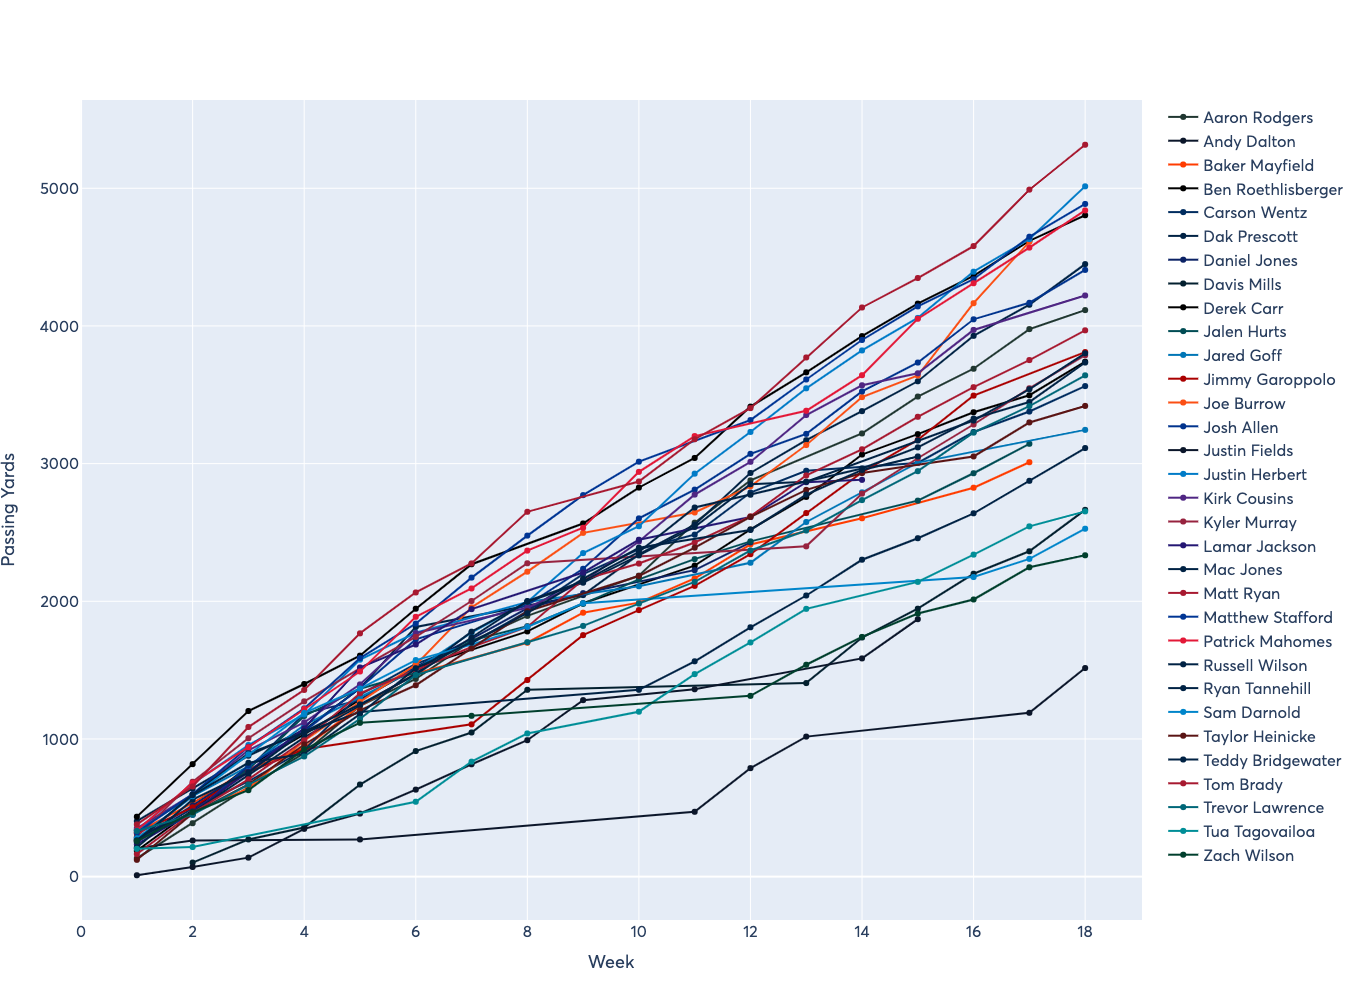

In [16]:
fig = go.Figure()

for name, values in df_agg.groupby("full_name"):
    if values["passing_yards"].sum() > 1500:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["passing_yards"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} yds through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Passing Yards",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)

fig.show()

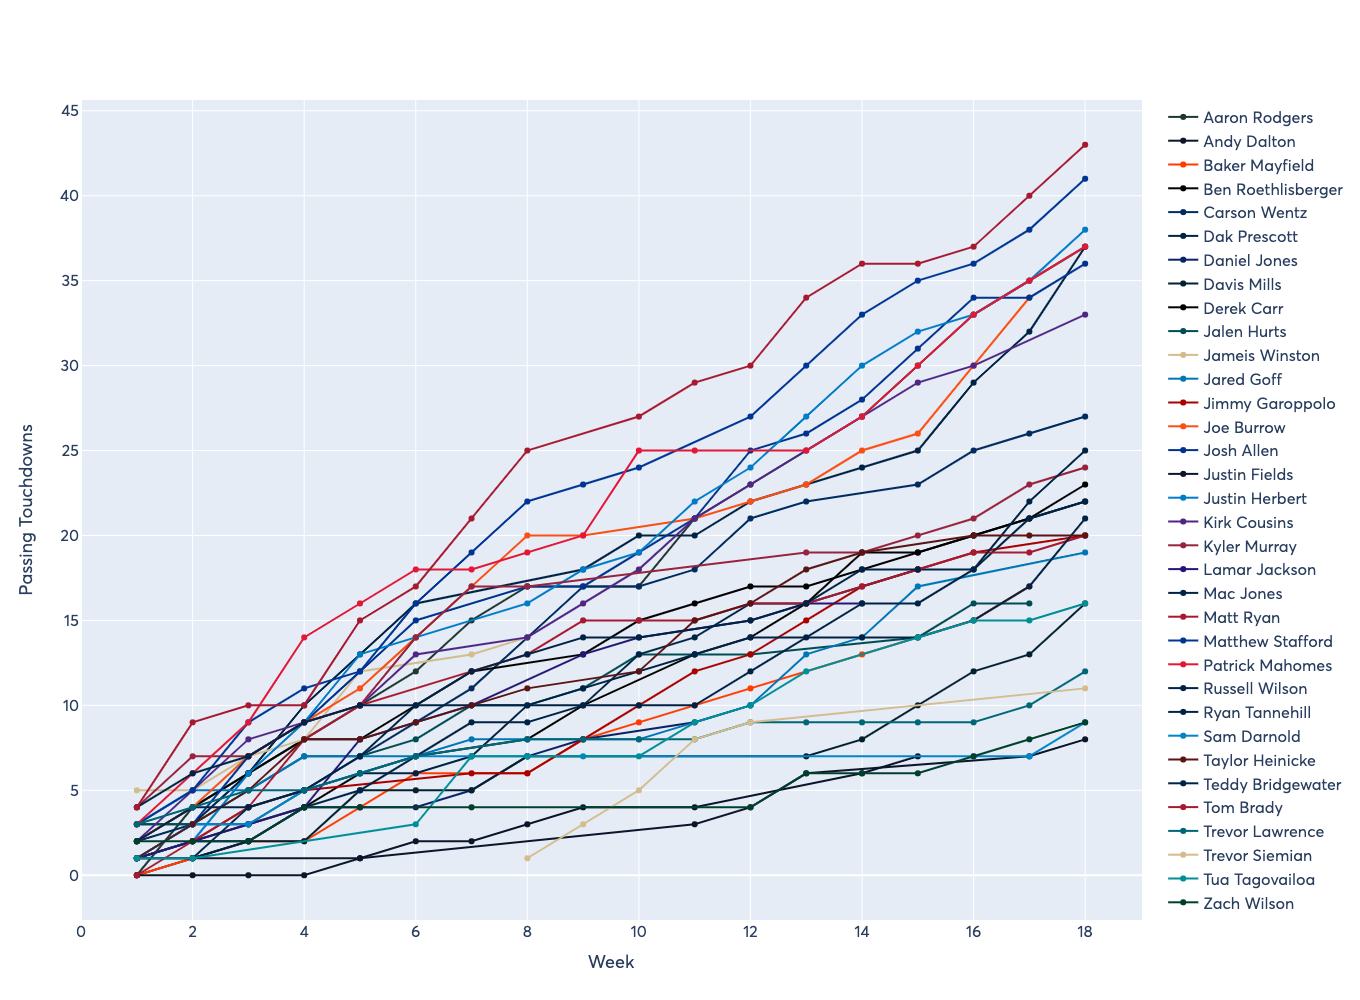

In [17]:
fig = go.Figure()

for name, values in df_agg.groupby("full_name"):
    if values["pass_touchdown"].sum() > 5:
        fig.add_trace(
            go.Scatter(
                x=values["week"], 
                y=values["pass_touchdown"].cumsum(), 
                name=name, 
                mode="markers+lines", 
                line_color=values.iloc[0].team_color,
                hovertemplate=f"<b>{name}</b><br>%{{y}} TDs through week %{{x}}<extra></extra>"
            )
        )
    
fig.update_layout(
    font_family="Averta, sans-serif",
    hoverlabel_font_family="Averta, sans-serif",
    xaxis_title_text="Week",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Passing Touchdowns",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    legend_font_size=16,
    height=1000,
    width=1000
)
    
fig.show()